# Homework 6

The focus of this homework will be Network and Graphs as well as Neural Networks.

## Exercise 1 [25pts]

In this exercise, you will try to recommend new collaborations to researchers
of the Machine Learning community. Our approach will follow the guidelines of
collaborative filtering: “If your past behavior/preferences were similar
to some other user’s, your future behavior may be as well”. As an
example, imagine you like Rolling Stones, Beatles and Jimmy Hendrix. It turns
out that most people that like the aforementioned artists, are also fans of Eric
Clapton. Then, it is very likely that if you listen to Eric Clapton’s music, you
will like it as well.

In this assignment you will implement a recommendation system for suggesting new collaborations to Machine Learning researchers.

A network as a graph: A graph or network represents relationships among
different entities (users of a social network, researchers, products, etc.). Those
entities are represented as nodes and the relationships between them (friends
on Facebook, co-authors of a research paper, products purchased together) as
edges. When there is an edge between two nodes, x and y, we say that y is a
neighbor (or friend) of x (and also - as the graphs we consider are undirected -
x is also a neighbor of y).

Each line of `edges.txt` contains the names of two researchers that have co-authored a paper in one of the top Machine Learning conferences (NeurIPS, ICLR, ICML) between 2010 and 2016.

a) Write a function that reads the file “old edges.txt” and create a
graph using NetworkX. (This is a tab-separated value (TSV) file, you may
use packages such as Pandas to read it.) [5pts]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


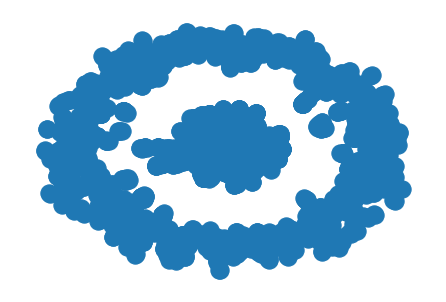

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

def graph_plot(file):
    df = pd.read_csv(file, sep = '\t', header = None, names = ['from', 'to'])

    G = nx.Graph()

    uniq_from = list(df['from'].unique())
    uniq_to = list(df['to'].unique())

    nodes = uniq_from+uniq_to
    nodes = list(set(nodes)) # get only one instance
    len(nodes)

    G.add_nodes_from(nodes)


    records = df.to_records(index=False)
    edges = list(records)

    G.add_edges_from(edges)

    nx.draw(G)  
    return G

    
G = graph_plot('/content/drive/MyDrive/Colab_Notebooks/edges.txt')

b) Recommend by number of common friends. [10pts]

The intuition behind this recommendation algorithm is that if non-friend
Y is your friend’s friend, then maybe Y should be your friend too. If
person Y is the friend of many of your friends, then Y is an even better
recommendation.

Write a function `common_friends_number(G, X)` that, given G and an author
X, returns a list of recommendations for X. The authors in this list are sorted
by the number of common neighbors they have with X (and are not of course
already friends with X). If there are ties, you can break them arbitrarily.

In [6]:
def common_friends_number(G,X):
    common_friends_number = {}
    user_friends = mutual_friends(G, X)

    for friend in user_friends:
        length = len(common_friends(G, X, friend))
        if length >= 1:
            common_friends_number[friend] = length

    df = pd.DataFrame(common_friends_number.items(), columns=['Name', 'Number'])

    return df.sort_values(by=['Number'], ascending=False)

def mutual_friends(G, X):
    user_friends = friends(G, X)
    user_mutual = set()

    for friend in user_friends:
        user_mutual.update(friends(G, friend) - user_friends)

    return user_mutual - {X}

def common_friends(G, user1, user2):
    return friends(G, user1).intersection(friends(G, user2))

def friends(G, X):
    return set(G.neighbors(X))

common_friends_number(G,'Alan Fern')

,Name,Number
1,Shahed Sorower,3
2,John Walker Orr,3
7,Thomas G. Dietterich,3
5,Ali Jalali,2
0,Anh T. Pham,1
3,Yuyang Wang,1
4,Rishit Sheth,1
6,Raviv Raich,1
8,Jesús Pérez Arriaga,1


c) Make recommendations using Jaccard’s Index. [10points]

If Γ(X) is the set of neighbors of X, then the metric we used in part (c), assigns to a non-friend y, the following recommendation score (with respect to X):

score(y) = |Γ(X)∩Γ(y)|.

Jaccard’s Index scales this score by taking into account the union of X and Y ’s neighbors. Intuitively, X and Y are more similar, if what they have in common is as close as possible to what they have together.

Write a function jaccard index(G, X) that given G and an author X, returns a
list of recommendations for X. The authors in this list are sorted by the number
of their Jaccard Index with respect to X (and are not of course already friends
with X). If there are ties, you can break them arbitrarily.

Jaccard Index = |Γ(X)∩Γ(y)| / |Γ(X)∪Γ(y)|

In [5]:
def jaccard_index(G, X):
    common_friends_number = {}
    user_friends = mutual_friends(G, X)

    for friend in user_friends:
        common_friends_number[friend] = jaccard_set(X, friend)


    df = pd.DataFrame(common_friends_number.items(), columns=['Name', 'Score'])

    return df.sort_values(by=['Score'], ascending=False)

def jaccard_set(list1, list2):
    """Define Jaccard Similarity function for two sets"""
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

def mutual_friends(G, X):
    user_friends = friends(G, X)
    user_mutual = set()

    for friend in user_friends:
        user_mutual.update(friends(G, friend) - user_friends)

    return user_mutual - {X}

def common_friends(G, user1, user2):
    return friends(G, user1).intersection(friends(G, user2))

def friends(G, X):
    return set(G.neighbors(X))

jaccard_index(G,'Alan Fern')

,Name,Score
2,John Walker Orr,0.333333
5,Ali Jalali,0.266667
0,Anh T. Pham,0.250000
8,Jesús Pérez Arriaga,0.217391
1,Shahed Sorower,0.210526
3,Yuyang Wang,0.176471
7,Thomas G. Dietterich,0.160000
6,Raviv Raich,0.111111
4,Rishit Sheth,0.105263


## Exercise 2 [55pts]

This exercise will focus on Neural Networks and visualization.

a) Write a function that takes a keras network and outputs an image (png format) of the network. [10pts]

You can assume the model is sequential and only uses dense layers. The output image for

```python
    model = keras.models.Sequential()
    model.add(layers.Dense(2, input_dim=2))
    model.add(layers.Dense(1))
    model.compile(loss="binary_crossentropy")
```

should look something like this

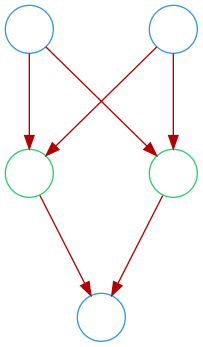

In [ ]:
from IPython.display import Image
Image(filename="example.png")

In [7]:
!apt install libgraphviz-dev
!sudo apt-get install graphviz graphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 42 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.

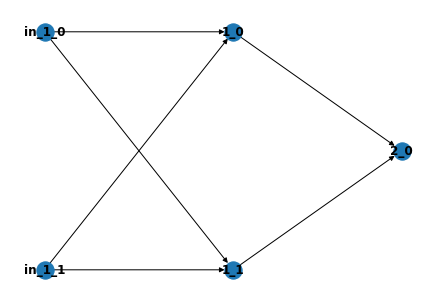

In [8]:
import networkx as nx
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def visual(model):
    list = []

    for i in range(model.input.get_shape()[1]):
      for j in range(model.layers[0].units):
        list.append(['in_1_'+ str(i) , '1_'+ str(j) , 1])

    for k in range(len(model.layers)-1):
      for i in range(model.layers[k].units):
        for j in range(model.layers[k+1].units):
          list.append([str(k+1)+'_'+ str(i) , str(k+2) +'_'+ str(j) , 1])

    G = nx.DiGraph()
    G.add_weighted_edges_from(list)
    pos = graphviz_layout(G, prog='dot', args="-Grankdir=LR")
    nx.draw(G,with_labels=True,pos=pos, font_weight='bold')

# defining the model 
model = keras.models.Sequential()
model.add(layers.Dense(2, input_dim=2))
model.add(layers.Dense(1))
model.compile(loss="binary_crossentropy")

# caliling the function for testing
visual(model)

Hint: use the networkx library (specifically the [to_agraph](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_agraph.to_agraph.html) method)

b) Generate 100 datapoints of the form y = 3x + 1 + e where e ~ N(0, 1) and plot the data in a scatter plot [5pts]

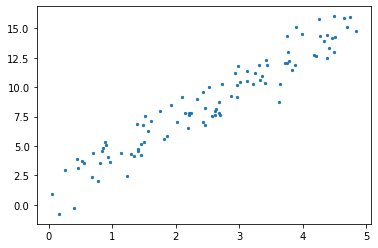

In [9]:
import numpy as np 
import matplotlib.pyplot as plt
x = np.random.uniform(0,5, size=100)
e = np.random.normal(0,1,100)


e = np.random.normal(0,1,100)
y = 3 * x + 1 + e

# Calculate scaled x, y [0,1] for better convergence
minx = min(x)
maxx = max(x)
scale_x = (x-minx)/(maxx-minx)

miny = min(y)
maxy = max(y)
scale_y = (y-miny)/(maxy-miny)

plt.scatter(x,y, s=5);

c) Create a Neural Network with no hidden layers (just input to ouput each with just one neuron), using the `mean_squared_error` loss and no activation function. Create an image of this model using a) then train this model on the dataset from b). In a 3D plot, plot the weight, the bias, and the loss value. [10pts]

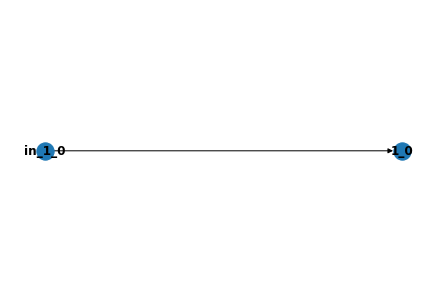

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

weights_dict = {}

weight_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: weights_dict.update({epoch:model.get_weights()}))

n_epochs = 1000

model = keras.Sequential(
    [
        layers.InputLayer(input_shape=(1,), name = 'input'),
        layers.Dense(1, name="output"),
    ]
)
model.compile(optimizer = 'rmsprop',loss = 'mse')


history = model.fit(scale_x,scale_y, batch_size = 10, epochs = n_epochs, validation_split = 0.2, callbacks=weight_callback, verbose =0)
# retrive weights
weight = []
bias = []
loss  = []
for i in range(n_epochs):
  weight.append(weights_dict[i][0].squeeze())
  bias.append(weights_dict[i][1].squeeze())
  loss.append(history.history['loss'][i])

visual(model)

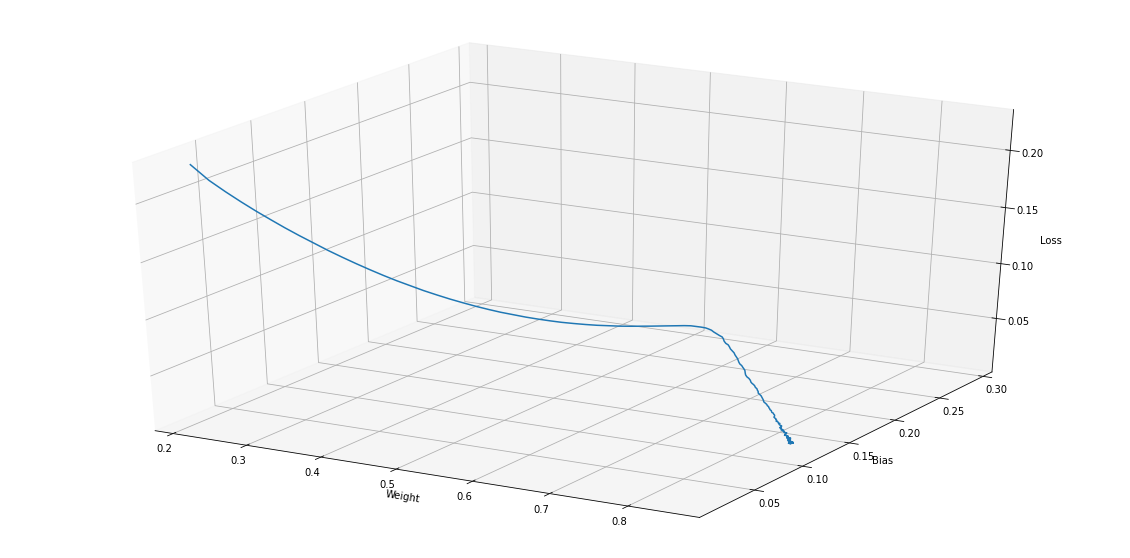

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection='3d')
line, = ax.plot(weight, bias, loss)
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('Loss');

d) Using matplotlib animation, re-train the model from c) and create an animation of the weight, bias, and loss at each training epoch. [10pts]

In [47]:
import tensorflow as tf
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model = keras.Sequential(
    [
        layers.InputLayer(input_shape=(1,), name = 'input'),
        layers.Dense(1, name="output"),
    ]
)

model.compile(optimizer=optimizer, loss  ='mse')

def train_on_batch(X,Y):
  history = model.fit(X,Y, batch_size = 10, epochs = 1,  verbose =0)
  loss = history.history['loss'][0]
  weights = model.get_weights()
  weight = weights[0].squeeze()
  bias = weights[1].squeeze()
  return loss, weight, bias

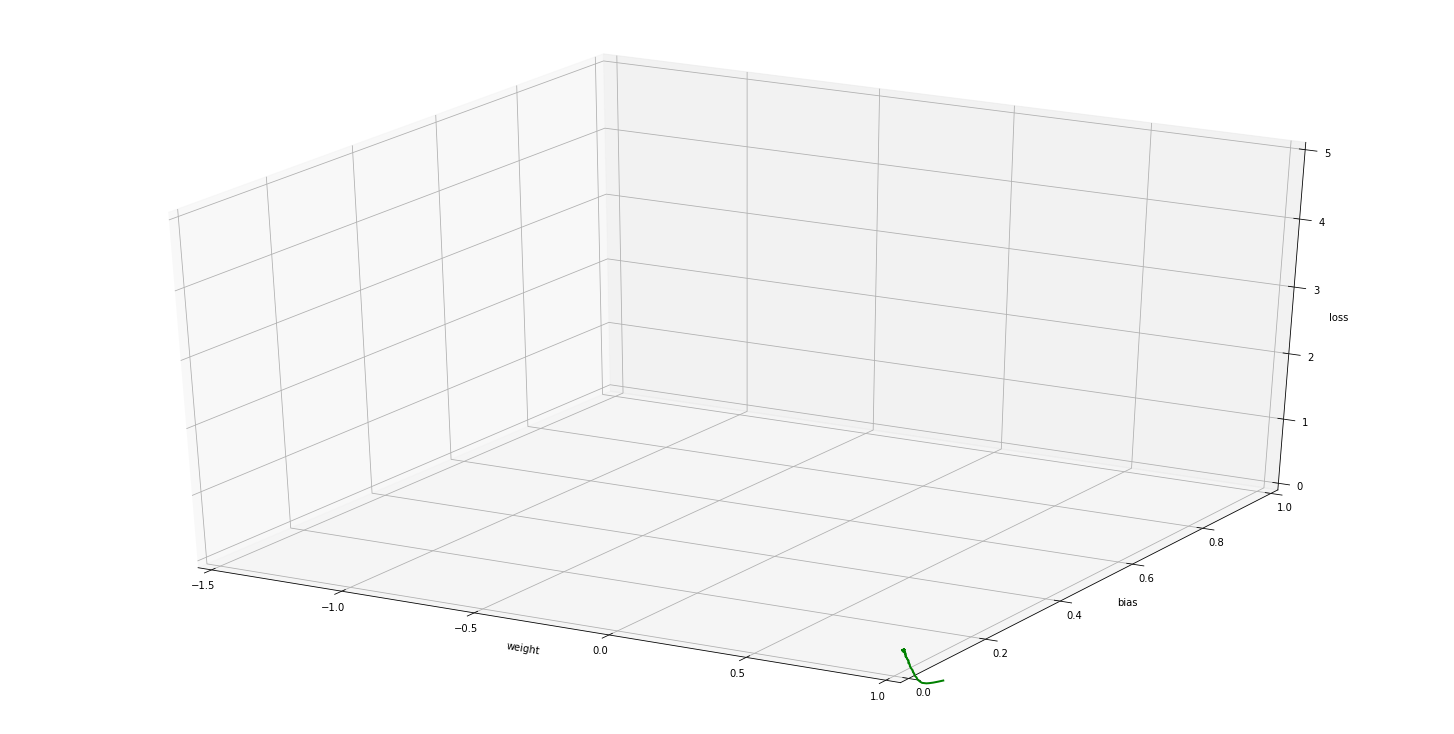

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
 

weight = []
bias = []
loss = []

def func(num, dataset, line):
    # NOTE: there is no .set_data() for 3 dim data...
    global weight, bias, loss, scale_x, scale_y, model

    mse, localwt, localbias = train_on_batch(scale_x,scale_y)    

    #print((localwt, localbias, mse))
    #print(mse)

    weight.append(localwt)
    bias.append(localbias)
    loss.append(mse)
    
    xy = [weight, bias]
     
    line.set_data(np.array(xy))
    line.set_3d_properties(np.array(loss))
    return line,
 
 
# THE DATA POINTS
dataset = np.array([x, y])
numDataPoints = 1000
 
# GET SOME MATPLOTLIB OBJECTS
fig = plt.figure(figsize =  (20,10))
ax = Axes3D(fig)
 
# NOTE: Can't pass empty arrays into 3d version of plot()
line = ax.plot([], [], [], lw=2, c='g')[0] # For line plot
 
# AXES PROPERTIES]
# ax.set_xlim3d([limit0, limit1])
ax.set_xlim((-1.5, 1))            
ax.set_ylim((0, 1))
ax.set_zlim(0,5)
ax.set_xlabel('weight')
ax.set_ylabel('bias')
ax.set_zlabel('loss')
 
# Creating the Animation object
line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(dataset,line), interval=1, blit=True)
#line_ani.save(r'AnimationNew.mp4')
 
from IPython.display import HTML
HTML(line_ani.to_html5_video())

e) Generate data of the form y = 3x^3 + 2x^2 + x + 1 + e where e ~ N(0, 1) and plot the data in a scatter plot [5pts]

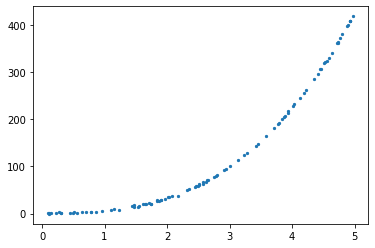

In [33]:
import numpy as np 
import matplotlib.pyplot as plt
x = np.random.uniform(0,5, size=100)
e = np.random.normal(0,1,100)
y = 3 * x**3 + 2*x**2 + 1 + e
# Calculate scaled x, y [0,1] for better convergence
minx = min(x)
maxx = max(x)
scale_x = (x-minx)/(maxx-minx)

miny = min(y)
maxy = max(y)
scale_y = (y-miny)/(maxy-miny)

plt.scatter(x,y, s=5);

f) Create and train a neural network on the dataset from b) and plot the resulting curve through the scatter plot. (you can use any number of epochs, hidden layers etc.) Also create an image of the network using the function from a) [10pts]

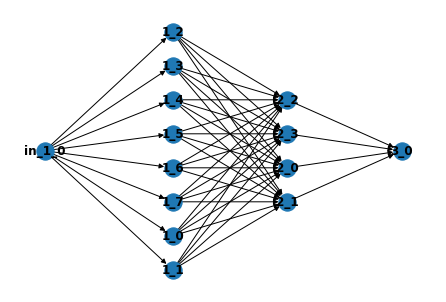

In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

weights_dict = {}

weight_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: weights_dict.update({epoch:model.get_weights()}))

n_epochs = 1000

model = keras.Sequential(
    [
        layers.InputLayer(input_shape=(1,), name = 'input'),
        layers.Dense(8, name="layer1"),
        layers.Dense(4, name="layer2"),
        layers.Dense(1, name="output"),
    ]
)
model.compile(optimizer = 'rmsprop',loss = 'mse')


history = model.fit(scale_x,scale_y, batch_size = 10, epochs = n_epochs, validation_split = 0.2, callbacks=weight_callback, verbose =0)
# retrive weights
weight = []
bias = []
loss  = []
for i in range(n_epochs):
  weight.append(weights_dict[i][0].squeeze())
  bias.append(weights_dict[i][1].squeeze())
  loss.append(history.history['loss'][i])

visual(model)

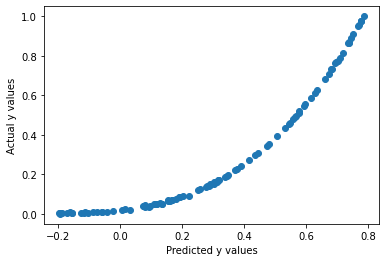

In [39]:
import matplotlib.pyplot as plt
scale_y_pred = model.predict(scale_x)
plt.scatter(scale_y_pred, scale_y)
plt.xlabel('Predicted y values')
plt.ylabel('Actual y values');

g) Using matplotlib animation, create an animation of the resulting curve from your model at each training epoch (up to 100 epochs). [5pts]

## Exercise 3 [20pts]

This exercise will focus on Neural Networks.



In [1]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn 
import torch.nn.functional as F
import torchvision 
import torchvision.transforms as transforms 
from torch.optim import SGD, Adam
from tqdm import tqdm 

a) Modify the number of layers to include atleast 2 hidden layers with appropriate number of neurons that use the sigmoid function in the forward pass: [5pts]

In [20]:
class NeuralNetwork(nn.Module):
  def __init__(self, input_size):
    super(NeuralNetwork, self).__init__()
    # You are free to define any number of layers you want to here

    self.layer1 = nn.Linear(input_size, 800)
    # your code here
    self.hidden1 = nn.Linear(800, 600)
    self.hidden2 = nn.Linear(600, 300)
    self.output = nn.Linear(300, 10)  
    self.activation = nn.Sigmoid()

  def forward(self, input):
    x = F.relu(self.layer1(input))
    # your code here
    x = F.relu(self.hidden1(x))
    x = F.relu(self.hidden2(x))
    # x = self.dropout(x)
    outputs = self.output(x)

    # return F.softmax(outputs)
    return outputs

b) Modify the following values to provide the highest accuracy on your Neural Network [2pts]

In [21]:
epochs = 10                   # number of epochs
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")     # device
criterion = nn.CrossEntropyLoss() # loss function
batch_size = 50


Run the following cell everytime you update parts a and b

In [22]:
net = NeuralNetwork(784).to(device)
optimizer = Adam(net.parameters(), lr = 1e-2)

total_loss = 0
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = torch.utils.data.DataLoader(training_data, batch_size = batch_size, shuffle = True, num_workers=2, drop_last=True)
train_dataloader2 = torch.utils.data.DataLoader(training_data, batch_size = batch_size, shuffle = True, num_workers=2, drop_last=True)

test_dataloader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = True, num_workers=2, drop_last=True)
test_dataloader2 = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = True, num_workers=2, drop_last=True)

c) You may change the model to increase the accuracy of this model. The goal is to attain the highest possible accuracy. You do not get marks for accuracies less than 83%. You may modify the values in parts a and b [8pts]

In [23]:
for epoch in tqdm(range(epochs)): 
  epoch_loss = 0
  for i, data in enumerate(train_dataloader): 
    inputs, labels = data 

    optimizer.zero_grad() 
    outputs = net(inputs.view(batch_size,-1).to(device))

    labels_ = F.one_hot(labels, num_classes= 10)

    loss = criterion(outputs,labels_.to(device).float())
    loss.backward()  # update network parameters

    optimizer.step() # update the optimizer parameters 

    total_loss += loss.item() 
    epoch_loss += loss.item()
  
  with torch.no_grad():
    net.eval()
    correct = 0
    total = 0
    for i, data in enumerate(train_dataloader2):
      input, labels = data
      outputs = net(input.view(batch_size,-1).to(device))

      total+= len(labels)

      predictions = torch.argmax(outputs, dim = 1)
      predictions = predictions.to("cpu").numpy() 
      correct += sum(1*(labels.numpy()==predictions))
  
  with torch.no_grad():
    net.eval()
    correct_test = 0
    total_test = 0
    for i, data in enumerate(test_dataloader):
      input, labels = data
      outputs = net(input.view(batch_size,-1).to(device))

      total_test+= len(labels)

      predictions = torch.argmax(outputs, dim = 1)
      predictions = predictions.to("cpu").numpy() 
      correct_test += sum(1*(labels.numpy()==predictions))

  print( " — epoch loss = %1.2f — training accuracy = %1.2f — test accuracy = %1.2f" %(epoch_loss, correct/total, correct_test/total_test))

 10%|█         | 1/10 [00:30<04:32, 30.26s/it]

 — epoch loss = 725.33 — training accuracy = 0.84 — test accuracy = 0.82


 20%|██        | 2/10 [01:00<04:01, 30.19s/it]

 — epoch loss = 571.88 — training accuracy = 0.85 — test accuracy = 0.83


 30%|███       | 3/10 [01:32<03:38, 31.22s/it]

 — epoch loss = 535.72 — training accuracy = 0.85 — test accuracy = 0.84


 40%|████      | 4/10 [02:02<03:04, 30.78s/it]

 — epoch loss = 523.05 — training accuracy = 0.86 — test accuracy = 0.84


 50%|█████     | 5/10 [02:33<02:32, 30.56s/it]

 — epoch loss = 505.55 — training accuracy = 0.85 — test accuracy = 0.83


 60%|██████    | 6/10 [03:03<02:01, 30.45s/it]

 — epoch loss = 510.17 — training accuracy = 0.86 — test accuracy = 0.84


 70%|███████   | 7/10 [03:33<01:31, 30.44s/it]

 — epoch loss = 493.92 — training accuracy = 0.86 — test accuracy = 0.85


 80%|████████  | 8/10 [04:03<01:00, 30.35s/it]

 — epoch loss = 480.69 — training accuracy = 0.86 — test accuracy = 0.84


 90%|█████████ | 9/10 [04:34<00:30, 30.32s/it]

 — epoch loss = 486.91 — training accuracy = 0.86 — test accuracy = 0.84


100%|██████████| 10/10 [05:04<00:00, 30.45s/it]

 — epoch loss = 494.24 — training accuracy = 0.85 — test accuracy = 0.84


d) Explain in ~150 words the method you used to increase the accuracy. [5pts]

To increase the accuracy, I only made use of Linear single layer feed forward network with n inputs and m output. I made use of 4 Linear layers, the first one having an input of 784 (the image size) and an output of 800, the second layer having an input of 800 and an output of 600, the third having an input of 600 and output of 300, and the final layer having an input of 300 and an output of 10 features. Each layer, except the final layer was passed through a ReLu activation function. 10 epochs, with a batch size of 50 gave me a testing accuracy of 0.84 and a training accuracy of 0.85. 